In [45]:
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns

base_path = 'data/SkillSpan/json/'
file_names = ['train.json', "dev.json", "test.json"]

dfs = {}

for file_name in file_names:
    file_path = base_path + file_name
    with open(file_path, 'r') as file:
        json_data = json.load(file)
        dfs[file_name.split('.')[0]] = pd.DataFrame(json_data)

train_df = dfs['train']

train_df['idx'] = train_df['idx'].apply(lambda x: f'train{x}')

print("\nTrain DataFrame:")
print(train_df.head())

tech_train_df = train_df[train_df["source"] == "tech"].copy()
house_train_df = train_df[train_df["source"] == "house"].copy()


Train DataFrame:
      idx                                             tokens  \
0  train1  [Senior, QA, Engineer, (, m/f/d, ), <ORGANIZAT...   
1  train1  [<ADDRESS>, <ADDRESS>, <ADDRESS>, <ADDRESS>, <...   
2  train1                        [Date, posted:, 2021-07-14]   
3  train1                [Likes:, 0, Dislikes:, 0, Love:, 0]   
4  train1                                [Job, description:]   

              tags_skill         tags_knowledge source  
0  [O, O, O, O, O, O, O]  [O, O, O, O, O, O, O]   tech  
1        [O, O, O, O, O]        [O, O, O, O, O]   tech  
2              [O, O, O]              [O, O, O]   tech  
3     [O, O, O, O, O, O]     [O, O, O, O, O, O]   tech  
4                 [O, O]                 [O, O]   tech  


In [46]:
tech_train_df = train_df[train_df["source"] == "tech"].copy()
house_train_df = train_df[train_df["source"] == "house"].copy()

In [48]:
len(house_train_df)

1667

In [49]:
len(tech_train_df)

3133

In [50]:
def count_sentences_with_tags(df):
    df['skill_B_present'] = df['tags_skill'].apply(lambda tags: 'B' in tags)
    df['knowledge_B_present'] = df['tags_knowledge'].apply(lambda tags: 'B' in tags)

    count_sentences_with_B = df[['skill_B_present', 'knowledge_B_present']].any(axis=1).sum()

    return count_sentences_with_B

count_sentences_with_tags(house_train_df)

562

In [51]:
count_sentences_with_tags(tech_train_df)

1022

In [52]:
percent_to_gen = 0.2

print("Tech sentences to generate with skills:", count_sentences_with_tags(tech_train_df) * percent_to_gen)

Tech sentences to generate with skills: 204.4


In [53]:
percent_to_gen = 0.2

print("House sentences to generate with skills:", count_sentences_with_tags(house_train_df) * percent_to_gen)

House sentences to generate with skills: 112.4


In [54]:
percent_to_gen = 0.2

print("Tech sentences to generate without skills:", 
      (len(tech_train_df) - count_sentences_with_tags(tech_train_df)) * percent_to_gen)

Tech sentences to generate without skills: 422.20000000000005


In [55]:
percent_to_gen = 0.2

print("House sentences to generate without skills:", 
      (len(house_train_df) - count_sentences_with_tags(house_train_df)) * percent_to_gen)

House sentences to generate without skills: 221.0


In [56]:
import pandas as pd
import json

def process_and_concatenate_data():
    base_path = 'data/SkillSpan/json/'
    file_names = ['train.json', 'dev.json', 'test.json']

    dfs = {}

    # Load and process each file
    for file_name in file_names:
        file_path = base_path + file_name
        with open(file_path, 'r') as file:
            json_data = json.load(file)
            # Create DataFrame and format the 'idx' column
            df = pd.DataFrame(json_data)
            df['idx'] = df['idx'].apply(lambda x: f'{file_name.split(".")[0]}{x}')
            dfs[file_name.split('.')[0]] = df

    # Extract the relevant subsets for tech and house sources from all DataFrames
    combined_tech_df = pd.concat([dfs[key][dfs[key]["source"] == "tech"].copy() for key in dfs], ignore_index=True)
    combined_house_df = pd.concat([dfs[key][dfs[key]["source"] == "house"].copy() for key in dfs], ignore_index=True)

    return combined_tech_df, combined_house_df

# Call the function to get the concatenated DataFrames
tech_df, house_df = process_and_concatenate_data()

print("\nTech DataFrame:")
print(tech_df.head())

print("\nHouse DataFrame:")
print(house_df.head())


Tech DataFrame:
      idx                                             tokens  \
0  train1  [Senior, QA, Engineer, (, m/f/d, ), <ORGANIZAT...   
1  train1  [<ADDRESS>, <ADDRESS>, <ADDRESS>, <ADDRESS>, <...   
2  train1                        [Date, posted:, 2021-07-14]   
3  train1                [Likes:, 0, Dislikes:, 0, Love:, 0]   
4  train1                                [Job, description:]   

              tags_skill         tags_knowledge source  
0  [O, O, O, O, O, O, O]  [O, O, O, O, O, O, O]   tech  
1        [O, O, O, O, O]        [O, O, O, O, O]   tech  
2              [O, O, O]              [O, O, O]   tech  
3     [O, O, O, O, O, O]     [O, O, O, O, O, O]   tech  
4                 [O, O]                 [O, O]   tech  

House DataFrame:
       idx                                             tokens  \
0  train81  [Were, changing, the, way, people, enjoy, win...   
1  train81  [By, harnessing, the, power, of, technology, a...   
2  train81  [Over, the, next, ten, years, t

In [57]:
def count_sentences_with_skill_tags(df):
    df['skill_B_present'] = df['tags_skill'].apply(lambda tags: 'B' in tags)

    count_sentences_with_B = df[['skill_B_present']].any(axis=1).sum()

    return count_sentences_with_B

count_sentences_with_skill_tags(house_df)

987

In [58]:
def count_sentences_with_knowledge_tags(df):
    df['knowledge_B_present'] = df['tags_knowledge'].apply(lambda tags: 'B' in tags)

    count_sentences_with_B = df[['knowledge_B_present']].any(axis=1).sum()

    return count_sentences_with_B

count_sentences_with_knowledge_tags(house_df)

575

In [59]:
def count_sentences_with_tags(df):
    df['skill_B_present'] = df['tags_skill'].apply(lambda tags: 'B' in tags)
    df['knowledge_B_present'] = df['tags_knowledge'].apply(lambda tags: 'B' in tags)

    count_sentences_with_B = df[['skill_B_present', 'knowledge_B_present']].any(axis=1).sum()

    return count_sentences_with_B

count_sentences_with_tags(tech_df)

2157

In [60]:
tech_total_tags = count_sentences_with_tags(tech_df)
house_total_tags = count_sentences_with_tags(house_df)

house_total = len(house_df)
tech_total = len(tech_df)

(tech_total_tags + house_total_tags) / (house_total + tech_total)

0.30076230076230076

In [61]:
tech_df

,idx,tokens,tags_skill,tags_knowledge,source,skill_B_present,knowledge_B_present
0,train1,"[Senior, QA, Engineer, (, m/f/d, ), <ORGANIZAT...","[O, O, O, O, O, O, O]","[O, O, O, O, O, O, O]",tech,False,False
1,train1,"[<ADDRESS>, <ADDRESS>, <ADDRESS>, <ADDRESS>, <...","[O, O, O, O, O]","[O, O, O, O, O]",tech,False,False
2,train1,"[Date, posted:, 2021-07-14]","[O, O, O]","[O, O, O]",tech,False,False
3,train1,"[Likes:, 0, Dislikes:, 0, Love:, 0]","[O, O, O, O, O, O]","[O, O, O, O, O, O]",tech,False,False
4,train1,"[Job, description:]","[O, O]","[O, O]",tech,False,False
...,...,...,...,...,...,...,...
7633,test32,"[Employee, Assistance, Program, and, cancer, s...","[O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O]",tech,False,False
7634,test32,"[20, weeks, birth-parent, leave, 12, weeks, no...","[O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O]",tech,False,False
7635,test32,"[On-site, fitness, options, and, on-demand, vi...","[O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O]",tech,False,False
7636,test32,"[Company, description:]","[O, O]","[O, O]",tech,False,False


In [150]:
def extract_skills(tokens, tags):
    skills_data = []  # Local list to store skill and length tuples

    skill = []
    for token, tag in zip(tokens, tags):
        if tag == 'B':
            if skill:
                skills_data.append((" ".join(skill), len(skill)))  # Append previous skill and its length
                skill = []  # Reset skill list
            skill.append(token)  # Start a new skill
        elif tag == 'I' and skill:
            skill.append(token)  # Continue the skill
        elif skill:
            skills_data.append((" ".join(skill), len(skill)))  # Append skill and its length
            skill = []  # Reset skill list
    if skill: 
        skills_data.append((" ".join(skill), len(skill)))

    return pd.DataFrame(skills_data, columns=['Skill', 'Length'])

In [148]:
def get_skills_from_df(df):
    all_skills_df = pd.DataFrame(columns=['Skill', 'Length'])
    for index, row in df.iterrows():
        skills_df = extract_skills(row['tokens'], row['tags_skill'])
        all_skills_df = pd.concat([all_skills_df, skills_df], ignore_index=True)
    return all_skills_df

def get_knowledge_from_df(df):
    all_skills_df = pd.DataFrame(columns=['Skill', 'Length'])
    for index, row in df.iterrows():
        skills_df = extract_skills(row['tokens'], row['tags_knowledge'])
        all_skills_df = pd.concat([all_skills_df, skills_df], ignore_index=True)
    return all_skills_df

In [149]:
def skill_counts(df):
    skill_counts = []
    for index, row in df.iterrows():
        skills_df = extract_skills(row['tokens'], row['tags_skill'])

        if not skills_df.empty:
            skill_counts.append(len(skills_df))
    
    return skill_counts;

def knowledge_counts(df):
    skill_counts = []
    for index, row in df.iterrows():
        skills_df = extract_skills(row['tokens'], row['tags_knowledge'])

        if not skills_df.empty:
            skill_counts.append(len(skills_df))
    
    return skill_counts;

In [146]:
import statistics

statistics.median(knowledge_counts(house_train_df))

2

In [137]:
sum(knowledge_counts(house_train_df)) / len(knowledge_counts(house_train_df))

2.7024221453287196

In [64]:
house_skills = get_skills_from_df(house_df)

house_skills['Length'].mean()

4.162855809612693

In [65]:
tech_skills = get_skills_from_df(tech_df)

tech_skills['Length'].mean()

4.575513851653262

In [66]:
combined_skills = pd.concat([house_skills, tech_skills], ignore_index=True)

combined_skills['Length'].mean()

4.373658981967587

In [67]:
house_knowledge = get_knowledge_from_df(house_df)

house_knowledge['Length'].mean()

2.1196036801132343

In [68]:
tech_knowledge = get_knowledge_from_df(tech_df)

tech_knowledge['Length'].mean()

1.7431336646612607

In [69]:
combined_knowledge = pd.concat([house_knowledge, tech_knowledge], ignore_index=True)

combined_knowledge['Length'].mean()

1.8447288006111535

In [84]:
file_path = './data/ESCO/skills_en.csv'
esco_dataset = pd.read_csv(file_path)

esco_dataset

esco_dataset['word_count'] = esco_dataset['preferredLabel'].apply(lambda label: len(label.split()))

count_knowledge_df = esco_dataset[esco_dataset['skillType'] == 'knowledge']
count_knowledge_df['word_count'].mean()

count_skills_df = esco_dataset[esco_dataset['skillType'] == 'skill/competence']
count_skills_df['word_count'].mean()

3.8657557012279566

/Users/andriimyronenko/anaconda3/envs/skill-extraction/lib/python3.11/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/Users/andriimyronenko/anaconda3/envs/skill-extraction/lib/python3.11/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


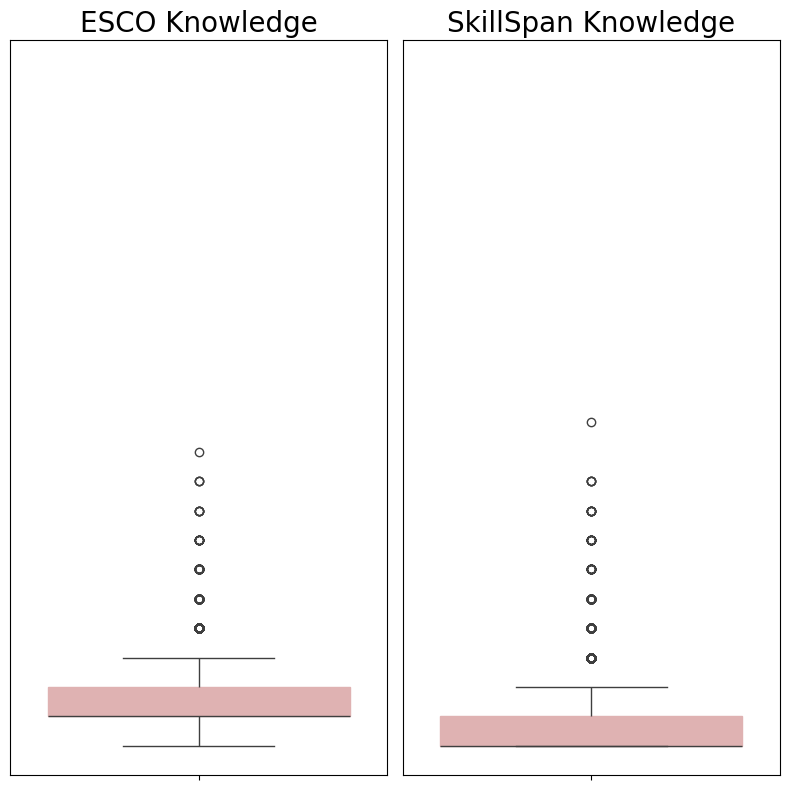

In [127]:
y_min = 0  # Gives a little margin
y_max = 25  # Gives a little margin

# Assuming 'count_knowledge_df' and 'combined_knowledge' are already defined and contain 'word_count' and 'Length' columns respectively
# Also, assuming y_min and y_max are defined based on your overall data range

plt.figure(figsize=(8, 8))  # Adjust the figure size for better fit

# First violin plot for ESCO knowledge
ax1 = plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=count_knowledge_df['word_count'],
            boxprops={'facecolor': '#dfb2b2', 'color': '#dfb2b2'})

plt.title('ESCO Knowledge', fontsize=20)  # Add a title
plt.ylim(y_min, y_max)  # Set y-axis limits

ax1.set_ylabel('')  # Remove y-axis label
ax1.tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels

# Second violin plot for SkillSpan knowledge
ax2 = plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(y=combined_knowledge['Length'],
            boxprops={'facecolor': '#dfb2b2', 'color': '#dfb2b2'})
plt.title('SkillSpan Knowledge', fontsize=20)  # Add a title
plt.ylim(y_min, y_max)  # Set y-axis limits

ax2.set_ylabel('')  # Remove y-axis label
ax2.tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot


/Users/andriimyronenko/anaconda3/envs/skill-extraction/lib/python3.11/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/Users/andriimyronenko/anaconda3/envs/skill-extraction/lib/python3.11/site-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


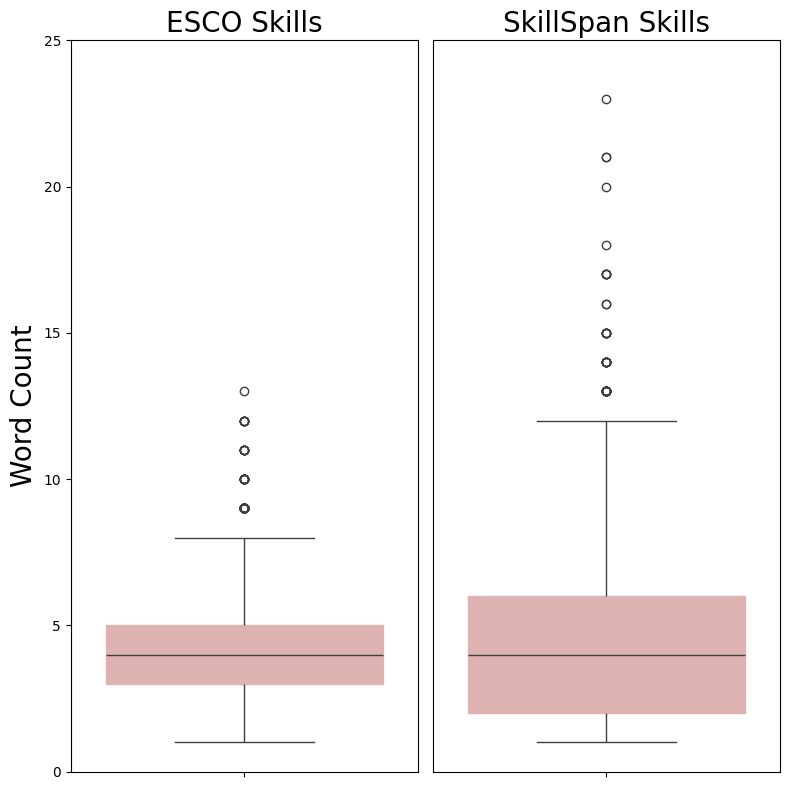

In [125]:
y_min = 0  # Gives a little margin
y_max = 25# Gives a little margin

# Assuming 'count_knowledge_df' and 'combined_knowledge' are already defined and contain 'word_count' and 'Length' columns respectively
# Also, assuming y_min and y_max are defined based on your overall data range

plt.figure(figsize=(8, 8))  # Adjust the figure size for better fit

# First violin plot for ESCO knowledge
ax1 = plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=count_skills_df['word_count'],
            boxprops={'facecolor': '#dfb2b2', 'color': '#dfb2b2'})
plt.title('ESCO Skills', fontsize=20)  # Add a title
plt.ylabel('Word Count', fontsize=20)  # Label the y-axis
plt.ylim(y_min, y_max)  # Set y-axis limits

# Second violin plot for SkillSpan knowledge
ax2 = plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(y=combined_skills['Length'],
            boxprops={'facecolor': '#dfb2b2', 'color': '#dfb2b2'})
plt.title('SkillSpan Skills', fontsize=20)  # Add a title
plt.ylim(y_min, y_max)  # Set y-axis limits

ax2.set_ylabel('')  # Remove y-axis label
ax2.tick_params(left=False, labelleft=False)  # Remove y-axis ticks and labels

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plot

In [152]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

def get_embeddings(sentences):
    return model.encode(sentences,
                        batch_size=32, 
                        show_progress_bar=True)

/Users/andriimyronenko/anaconda3/envs/skill-extraction/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [171]:
skillspan_knowledge = get_knowledge_from_df(house_train_df)["Skill"].tolist()
esco_knowledge = esco_dataset[esco_dataset['skillType'] == 'knowledge']['preferredLabel'].tolist()

skillspan_knowledge_df = pd.DataFrame(skillspan_knowledge, columns=['sentence'])
skillspan_knowledge_df['source'] = 'SkillSpan'

esco_knowledge_df = pd.DataFrame(esco_knowledge, columns=['sentence'])
esco_knowledge_df['source'] = 'ESCO' 

combined_df = pd.concat([skillspan_knowledge_df, esco_knowledge_df], ignore_index=True)

In [178]:
e = get_embeddings(combined_df['sentence'])

Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:03<00:00, 33.70it/s]


In [179]:
embedding_df = pd.DataFrame(e)

embedding_df.to_csv('./data/embeddings/knowledge_embeddings.tsv', sep='\t', index=None, header=None)

embedding_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.031901,0.021248,-0.054080,-0.030578,-0.042785,0.016468,0.032965,0.023002,-0.000891,0.003508,...,0.090704,-0.004525,0.011573,-0.076575,-0.030252,0.028472,-0.026871,-0.024000,0.048363,0.014087
1,-0.033249,0.016572,-0.012970,-0.024564,0.057902,0.015692,0.130501,0.032614,-0.032948,-0.054789,...,-0.014821,-0.053318,0.017956,-0.036012,0.052041,0.050809,0.053804,-0.070819,0.015791,0.018165
2,0.081866,0.019325,-0.012666,0.051803,-0.017821,0.010445,-0.071056,-0.027402,-0.001654,0.053118,...,-0.060167,-0.026586,0.040056,-0.097395,-0.106749,-0.038012,0.059220,-0.041641,0.110273,-0.033550
3,0.034316,0.019005,-0.034840,0.054006,-0.020094,0.043470,0.034464,-0.029757,0.023565,0.031588,...,-0.040247,-0.036933,0.004343,-0.043895,-0.110918,0.046226,0.073201,-0.130649,0.039893,0.010787
4,0.037306,-0.011174,-0.068716,0.001355,-0.004942,0.054073,0.014892,0.000478,-0.074032,-0.079535,...,-0.031484,0.029217,0.006060,-0.082749,-0.029417,-0.035972,0.072592,-0.107373,0.146233,-0.009732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,-0.053775,0.086385,0.021011,-0.048607,0.084406,0.022009,0.124326,0.028200,0.012487,0.017297,...,0.055406,-0.036535,0.040790,-0.063915,0.017589,0.057239,0.095280,0.014770,0.014328,0.020747
3836,-0.086993,0.022145,-0.009483,0.062336,-0.013713,-0.054174,0.120930,-0.013497,-0.064240,-0.075186,...,0.067857,0.018024,0.004762,-0.016011,-0.055909,0.002512,0.084553,-0.130715,0.069910,0.014257
3837,0.002216,-0.005356,-0.024660,0.012038,0.017341,0.018163,0.064144,0.089601,-0.008750,-0.037381,...,0.001089,-0.004388,0.001605,0.003970,-0.079317,-0.143915,0.008842,0.032797,0.123839,-0.061879
3838,-0.036955,-0.007524,-0.016246,-0.013298,-0.115894,-0.019334,0.073065,-0.019349,-0.031667,-0.061968,...,0.004273,0.011842,0.030427,-0.015432,-0.061670,0.054139,0.083380,0.033710,0.053961,0.003287


In [180]:
# Save dataframe without any index
combined_df.to_csv('./data/embeddings/knowledge_embeddings_metadata.tsv', index=False, sep='\t')

combined_df

,sentence,source
0,Business Development,SkillSpan
1,E-Commerce,SkillSpan
2,Bachelor and/or Master's degree,SkillSpan
3,MSc or MBA in business,SkillSpan
4,wine-industry,SkillSpan
...,...,...
3835,Capture One,ESCO
3836,precious metal processing,ESCO
3837,dependency on drugs,ESCO
3838,Scala,ESCO


In [175]:
skillspan_skills = get_skills_from_df(house_train_df)["Skill"].tolist()
esco_skills = esco_dataset[esco_dataset['skillType'] == 'skill/competence']['preferredLabel'].tolist()

skillspan_skills_df = pd.DataFrame(skillspan_skills, columns=['sentence'])
skillspan_skills_df['source'] = 'SkillSpan'

esco_skills_df = pd.DataFrame(esco_skills, columns=['sentence'])
esco_skills_df['source'] = 'ESCO' 

combined_skills_df = pd.concat([skillspan_skills_df, esco_skills_df], ignore_index=True)

In [183]:
e = get_embeddings(combined_skills_df['sentence'])

embedding_df = pd.DataFrame(e)

embedding_df.to_csv('./data/embeddings/skills_embeddings.tsv', sep='\t', index=None, header=None)

embedding_df

Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 370/370 [00:11<00:00, 33.49it/s]


,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,0.013854,-0.010080,-0.062893,-0.000097,-0.133891,0.064610,-0.021642,-0.013413,0.004274,-0.013244,...,0.019161,-0.029912,0.056726,0.031596,0.073044,0.001521,-0.023195,-0.058619,-0.012142,-0.016859
1,-0.021460,0.031680,0.039370,-0.014954,0.004351,-0.017210,-0.026667,0.000257,-0.067982,-0.016848,...,0.075912,-0.046119,-0.044529,0.005429,-0.022297,0.018684,-0.045233,-0.068304,0.011750,-0.022624
2,-0.014608,0.005721,-0.036150,-0.014837,-0.118894,0.058685,-0.033922,-0.044690,0.034879,-0.032858,...,-0.000122,-0.053479,0.055156,0.001220,0.069622,-0.008921,0.023675,-0.097853,0.029242,0.014697
3,-0.045904,-0.068901,0.021049,-0.053673,-0.092286,-0.000570,0.106139,-0.039257,-0.011320,-0.030032,...,-0.029140,-0.026972,0.015473,0.081002,0.063508,0.044251,-0.066104,0.007461,-0.003237,-0.045866
4,-0.005012,-0.040545,-0.012699,-0.056642,-0.068354,0.013159,-0.045967,-0.036965,-0.011530,-0.011027,...,0.084806,-0.033030,0.030446,0.025345,0.052565,0.066357,-0.077867,-0.139967,-0.041913,-0.012899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11810,-0.052748,0.065444,-0.012725,-0.011728,-0.009529,0.004005,-0.022003,0.012356,0.031689,-0.047602,...,0.027138,0.078048,0.017518,-0.043994,-0.045236,-0.028332,-0.051958,0.093276,-0.011867,-0.013986
11811,0.004126,0.106269,0.046637,-0.049631,-0.057353,0.049331,0.128613,0.018053,-0.107398,-0.076378,...,-0.052551,0.027726,0.089453,0.013903,-0.122836,-0.011658,0.032813,0.023353,0.005955,0.017603
11812,0.029719,-0.015401,0.063223,0.007278,-0.012484,-0.021765,0.067005,-0.012341,-0.032107,0.039076,...,-0.020177,-0.038751,0.078229,0.012757,-0.045374,-0.037192,-0.050916,0.078369,0.000893,0.001771
11813,0.002637,-0.027480,0.018945,-0.023459,-0.019053,-0.005968,-0.011953,-0.045156,-0.011123,0.044582,...,0.066221,0.087842,0.027835,-0.097905,0.012853,-0.030099,-0.084156,0.021748,0.001053,-0.057938


In [185]:
# Save dataframe without any index
combined_skills_df.to_csv('./data/embeddings/skills_embeddings_metadata.tsv', index=False, sep='\t')

combined_skills_df

,sentence,source
0,setting up partnerships,SkillSpan
1,improve supply,SkillSpan
2,building partnerships,SkillSpan
3,acquire new customers,SkillSpan
4,set up global partnerships,SkillSpan
...,...,...
11810,design clocks,ESCO
11811,remediate healthcare user's occupational perfo...,ESCO
11812,install transport equipment lighting,ESCO
11813,coordinate construction activities,ESCO
